In [86]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import sklearn
import mglearn
from matplotlib import pyplot as plt
from numpy import ravel
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from jupyterthemes import jtplot
from sklearn.svm import LinearSVC
jtplot.style(theme='onedork')

X, y=make_circles(noise=0.25, factor=0.5, random_state=1)
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X, y,
                                                                         random_state=0)
gb=GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("Predictions and their likelihoods: \n")
print(gb.predict(X_test))
print(gb.decision_function(X_test))

Predictions and their likelihoods: 

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.86776597]


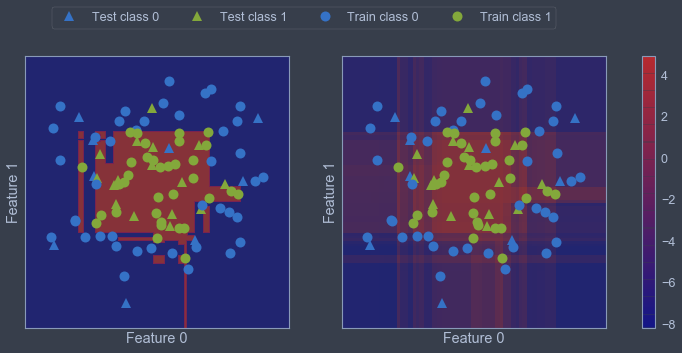

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gb, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gb, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
    markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
    markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

[[1.57362600e-02 9.84263740e-01]
 [8.45756491e-01 1.54243509e-01]
 [9.81128693e-01 1.88713075e-02]
 [9.74067751e-01 2.59322495e-02]
 [1.35214179e-02 9.86478582e-01]
 [2.50463685e-02 9.74953631e-01]
 [9.99543275e-01 4.56725227e-04]
 [1.61426459e-02 9.83857354e-01]
 [2.48330011e-01 7.51669989e-01]
 [3.20518856e-02 9.67948114e-01]
 [9.98441742e-01 1.55825797e-03]
 [1.35214179e-02 9.86478582e-01]
 [1.98099196e-02 9.80190080e-01]
 [7.68580268e-01 2.31419732e-01]
 [2.50463685e-02 9.74953631e-01]
 [9.84817488e-01 1.51825121e-02]
 [7.73836115e-01 2.26163885e-01]
 [9.80463918e-01 1.95360817e-02]
 [1.73607853e-02 9.82639215e-01]
 [1.61426459e-02 9.83857354e-01]
 [1.61426459e-02 9.83857354e-01]
 [3.41393690e-01 6.58606310e-01]
 [6.30759354e-02 9.36924065e-01]
 [9.34424780e-01 6.55752202e-02]
 [8.66199569e-01 1.33800431e-01]]


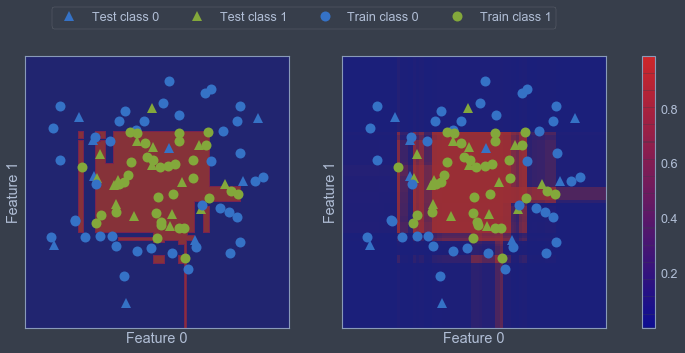

In [84]:
print(gb.predict_proba(X_test))
#Boundaries are much better defined. 

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gb, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gb, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

In [93]:
iris=load_iris()
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(iris.data, 
                                                                         iris.target,
                                                                         random_state=42)
gb=GradientBoostingClassifier(learning_rate=0.01, random_state=0).fit(X_train, y_train)

print(gb.predict(X_test))
print("Decision function: \n", gb.decision_function(X_test), "\n")
print(("Probabilities: \n"),gb.predict_proba(X_test)) 

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Decision function: 
 [[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53043817 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53043817 -0.4676268   1.50129926]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52419721 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52419721 -0.4676268   1.51953786]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.53107259 -0.45541112  1.46576456]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-